## Model Signiture with MLflow

#### Model signiture is an object that allows us to specify the data type and shape that the model can work on.

#### You can build a model signiture using `mlflow.types.schema`

In [ ]:
import mlflow
from mlflow_utils import create_mlflow_experiment
from mlflow.models.signature import ModelSignature
from mlflow.models.signature import infer_signature
from mlflow.types.schema import Schema
from mlflow.types.schema import ParamSchema
from mlflow.types.schema import ParamSpec
from mlflow.types.schema import ColSpec
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
from typing import Tuple

def get_train_data() -> Tuple[pd.DataFrame]:
    """
    Generate train and test data.

    :return: x_train,y_train
    """
    X, y = make_classification()
    features = [f"feature_{i+1}" for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=features)
    df["label"] = y

    return df[features], df["label"]

In [36]:
X_train, y_train = get_train_data()

print(X_train.head())
# print(y_train.head())
print(X_train.info())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -1.201183   1.016247   0.048663   0.244420  -2.880241  -3.269429   
1  -1.877101  -0.806603  -0.264468   0.404385   0.558561  -0.390860   
2   1.334741  -0.080834  -0.495585   2.922658  -0.260945   1.771953   
3  -0.450731   0.545779  -1.808946  -0.968887  -1.074346   2.231930   
4   1.161051   0.131469  -0.743462   0.563626  -1.467326  -0.094547   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0  -2.429654   0.530264   2.553249   -0.407145   -0.414696    1.151798   
1   0.176100   0.309046   0.375332    0.744301    1.832984   -0.784057   
2  -0.580651   0.116984   0.570811   -2.738946    0.921859   -0.612626   
3  -0.978274   0.924715   1.299982   -0.581170    1.027152   -0.143539   
4  -0.877583  -0.479286   0.830151   -0.337659    2.211519    1.227915   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0    0.498910   -0.585375    1.922103    0.719760  

#### The names of the data types should be standardized

In [32]:
data_map = {
    'int64': 'integer',
    'float64': 'double',
    'bool': 'boolean',
    'str': 'string',
    "date": 'datetime'
}

#### Define Input and Output Schema

In [26]:
cols_spec = []
for name, dtype in X_train.dtypes.to_dict().items():
    cols_spec.append(ColSpec(name=name, type=data_map[str(dtype)]))

input_schema = Schema(inputs=cols_spec)
output_schema = Schema([ColSpec(name="label", type="integer")])
print(input_schema)
print(output_schema)

['feature_1': double (required), 'feature_2': double (required), 'feature_3': double (required), 'feature_4': double (required), 'feature_5': double (required), 'feature_6': double (required), 'feature_7': double (required), 'feature_8': double (required), 'feature_9': double (required), 'feature_10': double (required), 'feature_11': double (required), 'feature_12': double (required), 'feature_13': double (required), 'feature_14': double (required), 'feature_15': double (required), 'feature_16': double (required), 'feature_17': double (required), 'feature_18': double (required), 'feature_19': double (required), 'feature_20': double (required)]
['label': integer (required)]


#### Define Parametre schema

In [28]:
parameter = ParamSpec(name="model_name", dtype="string", default="model1")
param_schema = ParamSchema(params=[parameter])
print(parameter)
print(param_schema)

'model_name': string (default: model1)
['model_name': string (default: model1)]


#### Model Signature (input schema + output schema + parametre schema)

#### You can either specify the signature or infer the signature based on the data.

In [ ]:
model_signature = ModelSignature(inputs=input_schema, outputs=output_schema, params=param_schema)
print(model_signature.to_dict())

MODEL SIGNATURE
{'inputs': '[{"type": "double", "name": "feature_1", "required": true}, {"type": "double", "name": "feature_2", "required": true}, {"type": "double", "name": "feature_3", "required": true}, {"type": "double", "name": "feature_4", "required": true}, {"type": "double", "name": "feature_5", "required": true}, {"type": "double", "name": "feature_6", "required": true}, {"type": "double", "name": "feature_7", "required": true}, {"type": "double", "name": "feature_8", "required": true}, {"type": "double", "name": "feature_9", "required": true}, {"type": "double", "name": "feature_10", "required": true}, {"type": "double", "name": "feature_11", "required": true}, {"type": "double", "name": "feature_12", "required": true}, {"type": "double", "name": "feature_13", "required": true}, {"type": "double", "name": "feature_14", "required": true}, {"type": "double", "name": "feature_15", "required": true}, {"type": "double", "name": "feature_16", "required": true}, {"type": "double", "

In [37]:
model_signature = infer_signature(X_train, y_train, params={"model_name": "model1"})
print("MODEL SIGNATURE")
print(model_signature.to_dict())

MODEL SIGNATURE
{'inputs': '[{"type": "double", "name": "feature_1", "required": true}, {"type": "double", "name": "feature_2", "required": true}, {"type": "double", "name": "feature_3", "required": true}, {"type": "double", "name": "feature_4", "required": true}, {"type": "double", "name": "feature_5", "required": true}, {"type": "double", "name": "feature_6", "required": true}, {"type": "double", "name": "feature_7", "required": true}, {"type": "double", "name": "feature_8", "required": true}, {"type": "double", "name": "feature_9", "required": true}, {"type": "double", "name": "feature_10", "required": true}, {"type": "double", "name": "feature_11", "required": true}, {"type": "double", "name": "feature_12", "required": true}, {"type": "double", "name": "feature_13", "required": true}, {"type": "double", "name": "feature_14", "required": true}, {"type": "double", "name": "feature_15", "required": true}, {"type": "double", "name": "feature_16", "required": true}, {"type": "double", "

c:\Users\dof07\anaconda3\envs\mlflow\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [38]:
experiment_id = create_mlflow_experiment(
    experiment_name="Model Signature",
    artifact_location="model_signature_artifacts",
    tags={"purpose": "learning"},
)

Experiment Model Signature already exists.


In [ ]:
with mlflow.start_run(experiment_id=experiment_id, run_name="model_signature_run") as run:
    mlflow.sklearn.log_model(
        sk_model=RandomForestClassifier(),
        artifact_path="model_signature",
        signature=model_signature,
    )

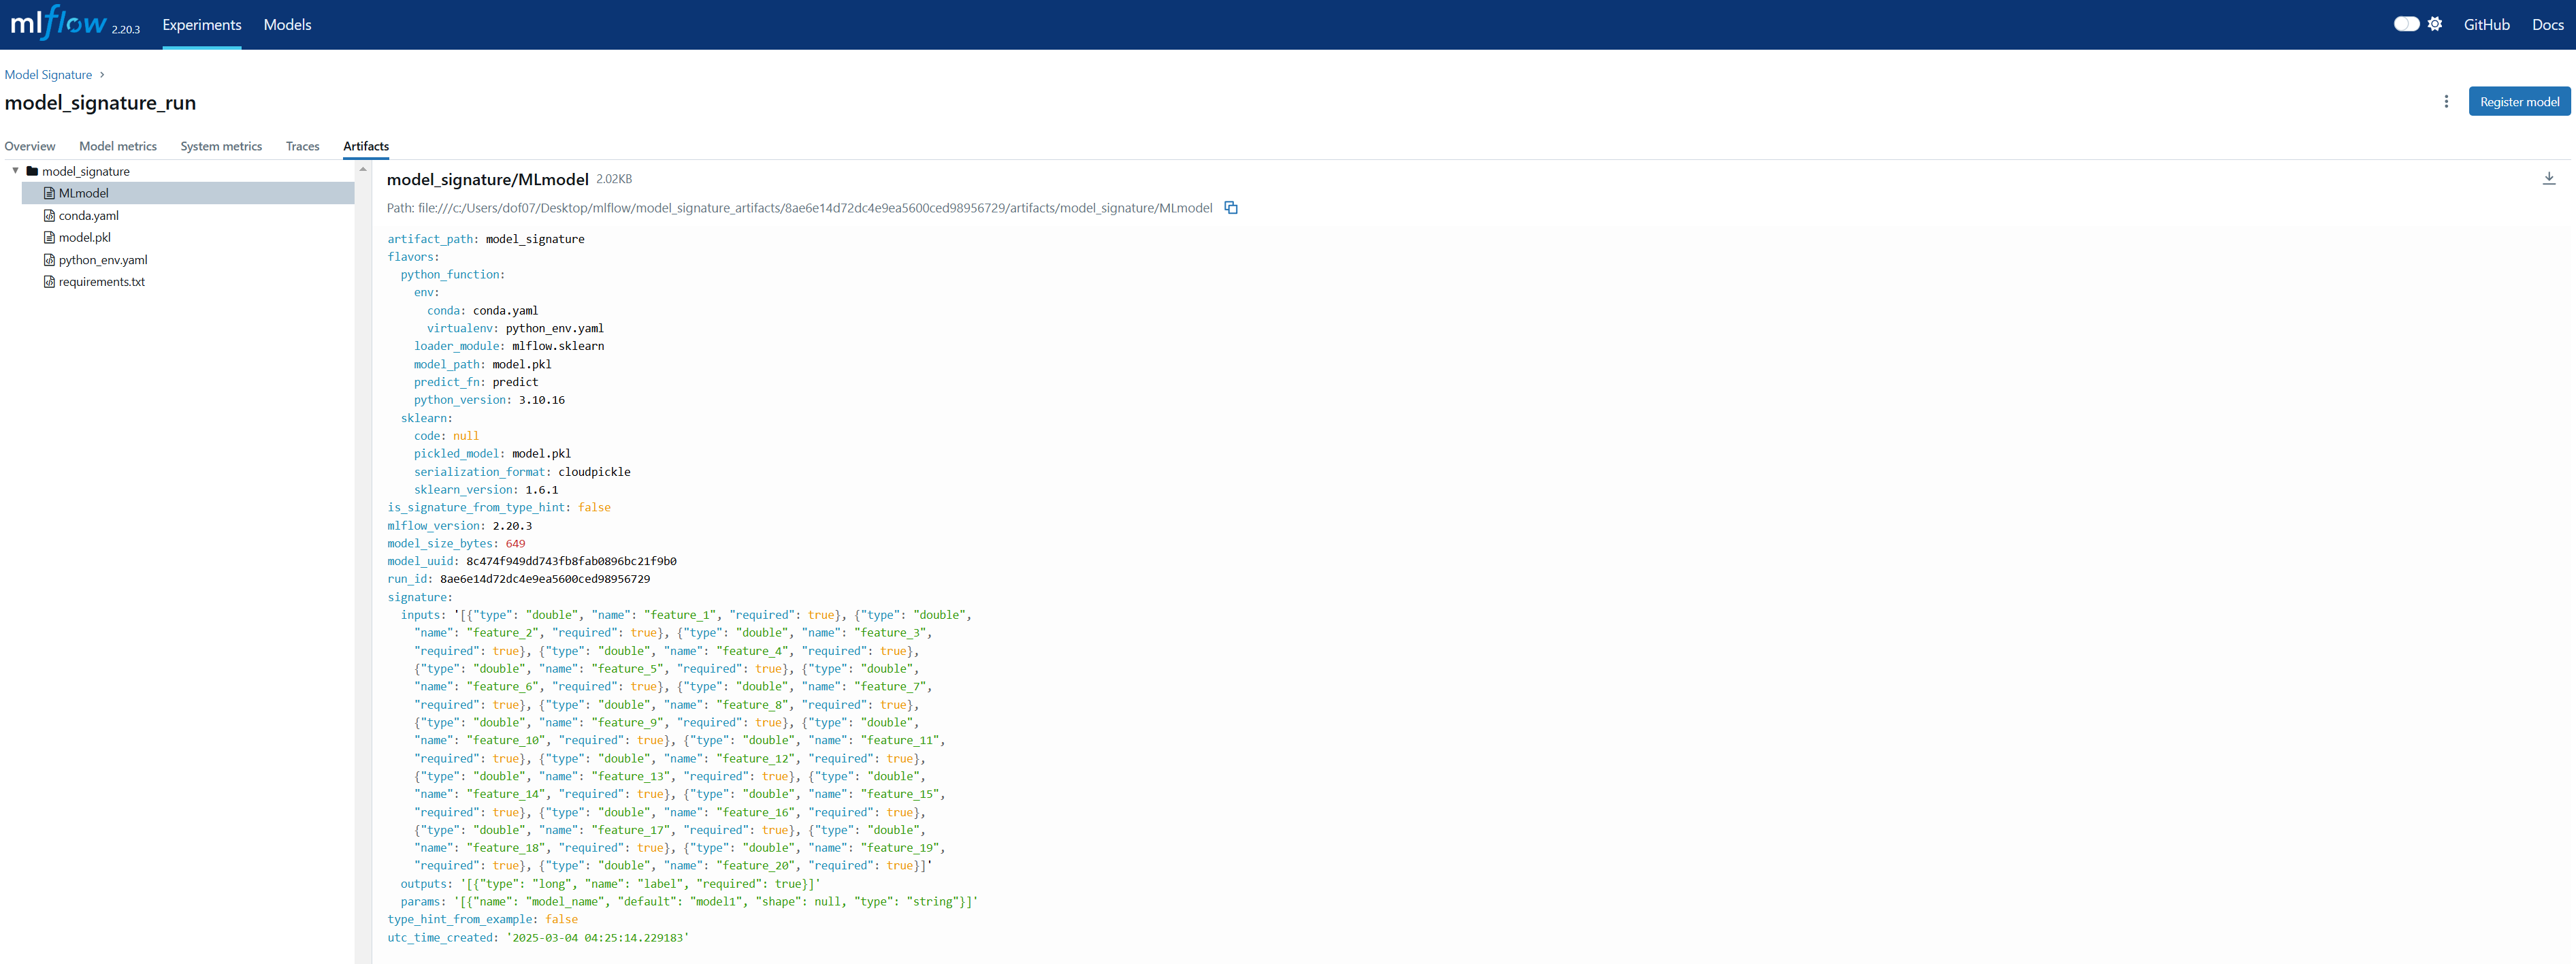